# Linear-Regression
pg. 390

Es un buen punto de partida para labores de regresión. Entrena muy rápido y es muy interpretable. Se puede extender a comportamientos más complejos.

### Simple Linear Regresion

Una linea recta del tipo: `y = ax +b`.  a es la pendiente y b la intersección.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

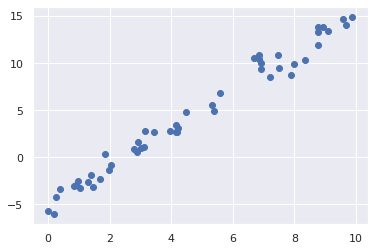

In [15]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

In [3]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

LinearRegression()

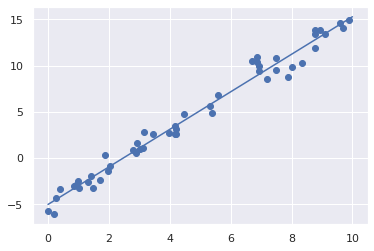

In [23]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [25]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


Se pueden predecir con multiples dimensiones: `y=a0+a1x1+a2x2+⋯`

In [26]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


### Basis Function Regression

Un truco para adaptar la regresión lineal a no lineal es transformar los datos de acuerdo a funciones básicas. EJ `PolynomialRegression`

In [28]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [29]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

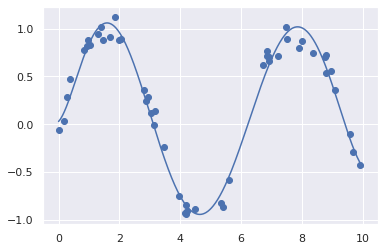

In [30]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);